# Part 1 - Introduction - what is geometry?

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-geometry?" data-toc-modified-id="What-is-geometry?-1">What is geometry?</a></span></li><li><span><a href="#Spatial-Reference-and-Coordinate-Systems" data-toc-modified-id="Spatial-Reference-and-Coordinate-Systems-2">Spatial Reference and Coordinate Systems</a></span><ul class="toc-item"><li><span><a href="#Geographic-coordinate-system" data-toc-modified-id="Geographic-coordinate-system-2.1">Geographic coordinate system</a></span></li><li><span><a href="#Projected-coordinate-system" data-toc-modified-id="Projected-coordinate-system-2.2">Projected coordinate system</a></span></li><li><span><a href="#Vertical-coordinate-system" data-toc-modified-id="Vertical-coordinate-system-2.3">Vertical coordinate system</a></span></li></ul></li><li><span><a href="#Datum-transformations" data-toc-modified-id="Datum-transformations-3">Datum transformations</a></span></li><li><span><a href="#Spatial-reference-when-using-the-Python-API---wkid-and-latestWkid" data-toc-modified-id="Spatial-reference-when-using-the-Python-API---wkid-and-latestWkid-4">Spatial reference when using the Python API - <code>wkid</code> and <code>latestWkid</code></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

## What is geometry?

Geometry is the branch of mathematics dealing with spatial relationships, measures, and properties of points, lines, and surfaces. In GIS applications, vector geometry is used to represent the spatial component of geographic features with discrete boundaries such as wells, rivers, states, streets, and parcels.

In GIS, a geometry could be of the following types:

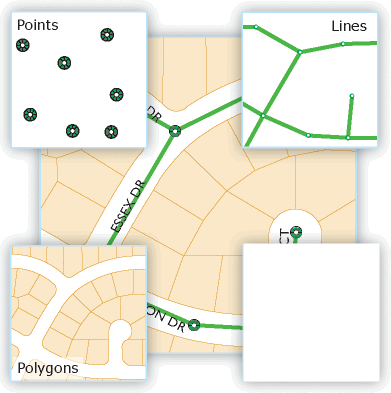

1. **Points** - these are the simplest forms of geometries. They define a single location, such as the user's GPS coordinates, locations of earthquakes, location of your parked car etc.

2. **Polylines** define a series of points representing a line, such as a road or a river or an oil pipeline.

3. **Polygons** define a closed shape (consisting of a series of polylines), such as the outline of a property parcel, outline of a lake or school campus.


The topic [Features and Geometries](https://developers.arcgis.com/documentation/core-concepts/features-and-geometries/) provides you more information and examples of geometries and how it relates to the ArcGIS developer ecosystem. The `geometry` module of the ArcGIS API for Python provides a pythonic model to construct, visualize and work with geometries. Before we get any further into these individual geometry types, we need to discuss about an important concept called **spatial reference**

## Spatial Reference and Coordinate Systems

**Spatial reference** defines the measurement system used to locate the geometry on a model of the Earth. For people that are new to GIS, this may come as a surprise, there are several such models to represent Earth. These models are a mathematical approximations of Earth and as such, each model is designed to suit a specific purpose - such as for navigation, area calculation, large area display etc. ArcGIS supports over a [thousand such systems](https://desktop.arcgis.com/en/arcmap/latest/map/projections/pdf/geographic_coordinate_systems.pdf), called **coordinate systems** or **coordinate reference systems**.


When spatial data is created, it is often specified with a spatial reference in the form a particular **coordinate system**. Most spatial references fall into one of two categories - **geographic coordinate systems** and **projected coordinate systems**. To integrate spatial data from various sources, the data must be transformed to a common coordinate system. Thus spatial reference system must be clearly defined not only to verify the integrity of geometric calculations between shapes, but also to allow transformations to take place between shapes in different coordinate systems.

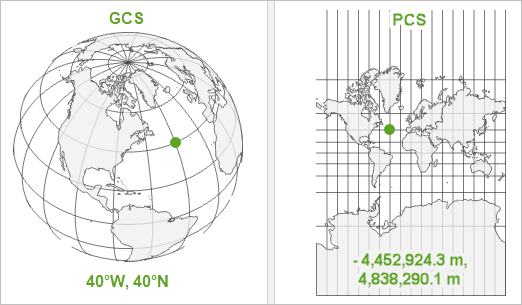

### Geographic coordinate system

A geographic coordinate system (GCS) treats the Earth as a 3D spherical surface. It uses an ellipsoidal surface for approximation and uses angular units to define locations on the Earth. There are three parts to a geographic coordinate system:

- A datum, which is an ellipsoidal (spheroid) model of the Earth
- A prime meridian
- An angular unit of measure

Common datums include *WGS84* (used in GPS) and *NAD83* (used in surveying and mapping in North America).

The following example is a string representing a geographic coordinate system (GCS) based on the WGS 1984 datum. The name for this system is `GCS_WGS_1984`. Each GCS has a well-known text (`wkt`), representing the details and a well-known id (`wkid`),`4326` in this example, which is used in developer APIs such as the REST API and in the Python API.

```
GEOGCS["GCS_WGS_1984",
		DATUM["D_WGS_1984", 
			SPHEROID["WGS_1984",6378137, 298.257223563]
			],
		PRIMEM["Greenwich",0],
        UNIT["Degree",0.0174532925199433]
       ]
```
The `wkt` of a GCS has 3 main parts: a DATUM, SPHEROID and a PRIMEM (prime meridian). To see the list of supported GCS, their `wkt` and `wkid` (explained below), go [here](https://developers.arcgis.com/rest/services-reference/geographic-coordinate-systems.htm).

### Projected coordinate system

Projected Coordinate Systems (PCS) define a flat 2D Cartesian surface. To draw / display any geographic data on a flat map or surface such as the computer screen, it needs to be in a PCS. Unlike a geographic coordinate system, a projected coordinate system has constant lengths, angles, and areas across the two dimensions. A projected coordinate system is always based on a geographic coordinate system that references a specific datum. When your data is in a GCS, ArcGIS can still draw it on a flat surface (such as the map-widget) by projecting to an appropriate PCS on-the-fly for the purpose of display.

Further, many types of analyses and data are designed for two-dimensional or planar coordinates. Three-dimensional geographic data is converted to planar coordinates via a map projection. A map projection is a set of mathematical equations to convert from longitude and latitude (i, j) to planar coordinates (x, y). Converting from three to two dimensions causes distortions. A map projection is designed to minimize the distortion caused by flattening the Earth's surface. **A projected coordinate system consists of a linear unit of measure (usually meters or feet), a map projection, the specific parameters used by the map projection, and a geographic coordinate system**. 

The following example is the string representation of the California State Plane Zone, which is a projected coordinate system (PCS), with a `wkid` of `3857`. You can see that it references the same DATUM, SPHEROID, PRIMEM and UNIT fields as the `4236` projection expalaind in the GCS section earlier. It also defines a PROJECTION (Mercator_Auxiliary_Sphere) which defines how to project the 3D GEOGCS coordinates into 2D coordinates:

```
PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",
       GEOGCS["GCS_WGS_1984",
              DATUM["D_WGS_1984", SPHEROID["WGS_1984",6378137.0,298.257223563]],
              PRIMEM["Greenwich",0],
              UNIT["Degree",0.017453292519943295]],
       PROJECTION["Mercator_Auxiliary_Sphere"], PARAMETER["False_Easting",0.0],
                                                PARAMETER["False_Northing",0.0],
                                                PARAMETER["Central_Meridian",0.0],
                                                PARAMETER["Standard_Parallel_1",0.0],
                                                PARAMETER["Auxiliary_Sphere_Type",0.0],
                                                UNIT["Meter",1.0]]
```
To see the list of supported PCS, their `wkt` and `wkid` (explained below) go [here](https://developers.arcgis.com/rest/services-reference/projected-coordinate-systems.htm).

If projections and coordinate systems fascinate you and you would like to learn more, checkout this lively [blog on Geographic vs Projected Coordinate Systems](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/) and this [developer guide for coordinate systems](https://developers.arcgis.com/documentation/core-concepts/spatial-references/).

### Vertical coordinate system
A Vertical Coordinate System (VCS) defines the origin for height or depth values. Like a horizontal coordinate system (GCS, PCS), a vertical coordinate system ensures that data is spatially located accurately in relation to other data. This is especially important if you will edit the data, create new data, or perform analysis.

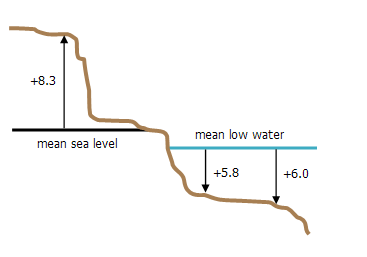

A vertical coordinate system includes unit of measure. This is always a linear unit, usually feet or meters. (for example, international feet or meters). A vertical coordinate system also includes a direction. This specifies whether values are "positive up", representing heights above a surface, or "positive down", indicating that values are depths below a surface. Depths are always displayed as positive values. The following diagram shows two vertical coordinate systems: mean sea level and mean low water. In this example, mean sea level is used as the zero level for height values. Mean low water is a depth-based vertical coordinate system.

 Also, a VCS can be referenced to two different types of surfaces - spheroidal (ellipsoidal) or gravity-related (geoidal):

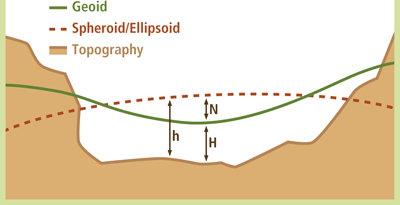

- **spheroidal (ellipsoidal)**: A spheroidal VCS defines heights that are referenced to a spheroid of a GCS. GPS natively reports heights relative to the WGS84 ellipsoid. A spheroidal height is a geometry quantity and does not have a physical sense because a GCS's spheroid may fall above or below the actual earth surface (as seen in the illustration above). Spheroidal heights for an area may not reflect movement due to gravity, that is, the flow of water. A VCS with heights or depths that are referenced to the spheroid will include a datum , rather than a vertical datum definition. An example is shown below.
```
VERTCS["WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],
       PARAMETER["Vertical_Shift",0.0],PARAMETER["Direction",1.0],UNIT["Meter",1.0]]
```

- **gravity-related (geoidal)**: Most VCS are gravity-related. A gravity-related VCS is often only loosely connected to a particular GCS. Any particular VCS may be used with different horizontal coordinate systems. A gravity-related VCS may set its zero point through a local mean sea level or a benchmark. Mean sea level will vary at different places due to topography, atmospheric effects, etc. A gravity-related VCS will include a vertical datum as part of its definition. An example is shown below.
```
VERTCS["National_Geodetic_Vertical_Datum_1929",VDATUM["NGVD_1929"],
       PARAMETER["Vertical_Shift",0.0],PARAMETER["Direction",1.0],UNIT["Meter",1.0]]
```

All VCS are mathematical approximations, just like GCS and PCS systems explained earlier. Such approximations are required to represent locations on a GIS. To learn more about VCS, their `wkt` and `wkid` (explained below), visit [here](https://pro.arcgis.com/en/pro-app/help/mapping/properties/vertical-coordinate-systems.htm). To see the list of supported VCS, go [here](https://developers.arcgis.com/rest/services-reference/vertical-coordinate-systems.htm).

## Datum transformations
Datum transformations are a set of mathematical formulas that convert geometries from one coordinate system to another. Similar to the coordinate systems explained earlier, there are two sets of transformations - geographic datum transformations and vertical datum transformations. Similar to coordinate systems, transformations have a `wkt` and a `wkid`. The example below represent the transformation used to convert a NAD 1983 coordinate system to a WGS 84 coordinate system, two popular systems used in the US. The `wkid` of this transformation is `1188` and the `wkt` is shown below:

```
GEOGTRAN["NAD_1983_To_WGS_1984_1",
		GEOGCS["GCS_North_American_1983",
				DATUM["D_North_American_1983",
					SPHEROID["GRS_1980",6378137.0,298.257222101]
					],
				PRIMEM["Greenwich",0.0],
				UNIT["Degree",0.0174532925199433]
			],
		GEOGCS["GCS_WGS_1984",
				DATUM["D_WGS_1984",
					SPHEROID["WGS_1984",6378137.0,298.257223563]
					],
				PRIMEM["Greenwich",0.0],
				UNIT["Degree",0.0174532925199433]
			],
		METHOD["Geocentric_Translation"],
		PARAMETER["X_Axis_Translation",0.0],
		PARAMETER["Y_Axis_Translation",0.0],
		PARAMETER["Z_Axis_Translation",0.0]
		]
```
In reality, there are 2 other transformations for the same two coordinate systems with `wkid`s `1251` and `1252`. ArcGIS supports a number of such transformations and you can look them up [here](https://developers.arcgis.com/rest/services-reference/datum-transformations.htm).

## Spatial reference when using the Python API - `wkid` and `latestWkid`

The sections above provide the theoretical background behind geometry in general. While using the ArcGIS API for Python, we primarily work with well-known IDs called as `wkid`. For instance, the `wkid` of Web Mercator PCS explained above is `3857`.

Occasionally, you might see a `latestWkid` being used. The `latestWkid` represents the current `wkid` value associated with the same spatial reference. For example, older versions of ArcGIS reference the same Web Mercator projection with a `wkid` of `102100`. In this case, the `latestWkid` key would reference the current id, which is `3857`.

The pages below give you the list of all coordinate systems, transformations, their names, `wkid` and `wkt` for your reference.

 - [Geographic Coordinate Systems Listing](https://developers.arcgis.com/rest/services-reference/geographic-coordinate-systems.htm)
 - [Projected Coordinate Systems Listing](https://developers.arcgis.com/rest/services-reference/projected-coordinate-systems.htm)
 - [Vertical Coordinate Systems Listing](https://developers.arcgis.com/rest/services-reference/vertical-coordinate-systems.htm)
 - [Datum Transformations Listing](https://developers.arcgis.com/rest/services-reference/datum-transformations.htm)
 - [Grid-based Datum Transformations Listing](https://developers.arcgis.com/rest/services-reference/grid-based-datum-transformations.htm)

## Conclusion
Geometry is a core concept in GIS which specifies how features on the Earth are stored and represented on a map. A foundational understanding of geometry will help GIS developers navigate the geospatial technology spectrum with ease. This page provided a high-level overview of different types of geometries and coordinate systems. In the subsequent pages, you will learn about how to create and work with geometries using the Python API.